In [14]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../data/clean_data/clean_data.csv')
df.head()

,duration_ms,loudness,tempo,valence,acousticness,danceability,energy,liveness
0,0.403695,0.451467,0.178779,0.963,0.732,0.819,0.341,0.160
1,0.483304,0.557378,0.412301,0.165,0.967,0.275,0.309,0.381
2,0.366304,0.530943,0.421576,0.253,0.957,0.418,0.193,0.229
3,0.983312,0.449265,0.529827,0.196,0.579,0.697,0.346,0.130
4,0.346890,0.514234,0.210284,0.406,0.996,0.518,0.203,0.115


# KMeans algo

In [3]:
from sklearn.cluster import KMeans

In [27]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(k)
    kmeans.fit(df.drop(columns=['liveness']))
    inertias.append(kmeans.inertia_)

len(inertias)

10

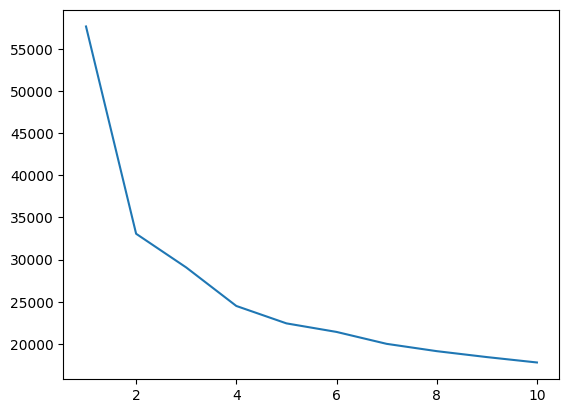

In [28]:
sns.lineplot(x=list(range(1, 11)), y=inertias);

<font color='red'>The optimal number of clusters appears to be 4</font>

In [33]:
kmeans = KMeans(4)

df_labeled = df.copy()

# A posteriori, the feature 'liveness' was adding complexity withou being useful for clustering
df_labeled['labels'] = kmeans.fit_predict(df_labeled.drop(columns=['liveness'])) 

In [34]:
df_labeled.head()

,duration_ms,loudness,tempo,valence,acousticness,danceability,energy,liveness,labels
0,0.403695,0.451467,0.178779,0.963,0.732,0.819,0.341,0.160,2
1,0.483304,0.557378,0.412301,0.165,0.967,0.275,0.309,0.381,1
2,0.366304,0.530943,0.421576,0.253,0.957,0.418,0.193,0.229,1
3,0.983312,0.449265,0.529827,0.196,0.579,0.697,0.346,0.130,1
4,0.346890,0.514234,0.210284,0.406,0.996,0.518,0.203,0.115,1


In [35]:
df_labeled.labels.value_counts(normalize=True)

labels
3    0.273511
2    0.260672
1    0.242081
0    0.223735
Name: proportion, dtype: float64

In [36]:
df_labeled.to_csv('../data/clustered_data/kmeans_data.csv', index=False)

In [37]:
kmeans.cluster_centers_

array([[0.5697019 , 0.60912361, 0.55462704, 0.36443946, 0.12893654,
        0.51227278, 0.67414434],
       [0.48139392, 0.33973015, 0.4369768 , 0.27578463, 0.86093781,
        0.41204703, 0.20626383],
       [0.40112475, 0.46634091, 0.51741085, 0.71041093, 0.78856263,
        0.6032799 , 0.3857406 ],
       [0.50783938, 0.5917858 , 0.53710636, 0.77148271, 0.17039263,
        0.66255078, 0.6900888 ]])

In [38]:
kmeans.inertia_

24506.845702827795